## Predict stock price using LSTM model. 

load the data and inspect them

In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


split the data into training and test sets 

In [3]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

## A standard model

## Lag: 1, Hidden Layers: 4, Dropout Rate: 0.2

1 day

In [4]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(740, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.2

In [5]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0750
Epoch 2/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0179
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0131
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0118
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0125
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0122
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0102
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0121
Epoch 9/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0121
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0093
Epoch 11/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0099
Epoch 12/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0088
Epoch 13/100
24/24 [=====

In [6]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [7]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

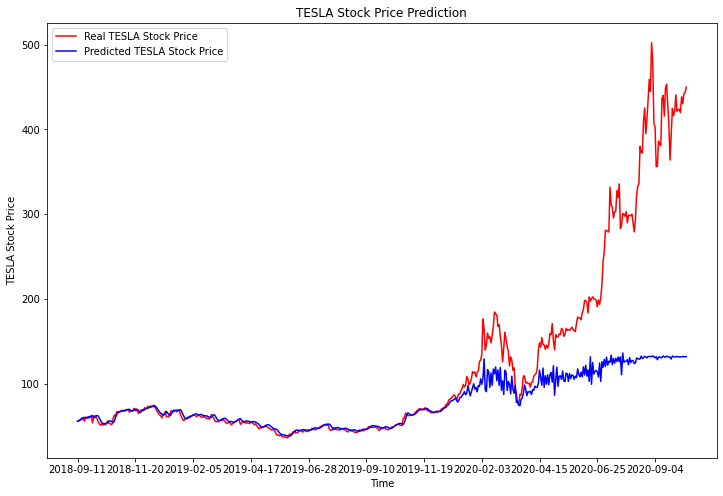

In [8]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 7, Hidden Layers: 4, Dropout Rate: 0.2

7 day

In [171]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800-7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+6, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(733, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.2

In [172]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0852
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0207
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0172
Epoch 4/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0164
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0154
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0173
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0160
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0164
Epoch 9/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0161
Epoch 10/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0149
Epoch 11/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0153
Epoch 12/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0144
Epoch 13/100
23/23 [=====

In [173]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_test1 = dataset_test[7:]
print(dataset_test1.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60+7, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(521, 1)
(521, 60, 1)


Make predictions using the test set

In [174]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

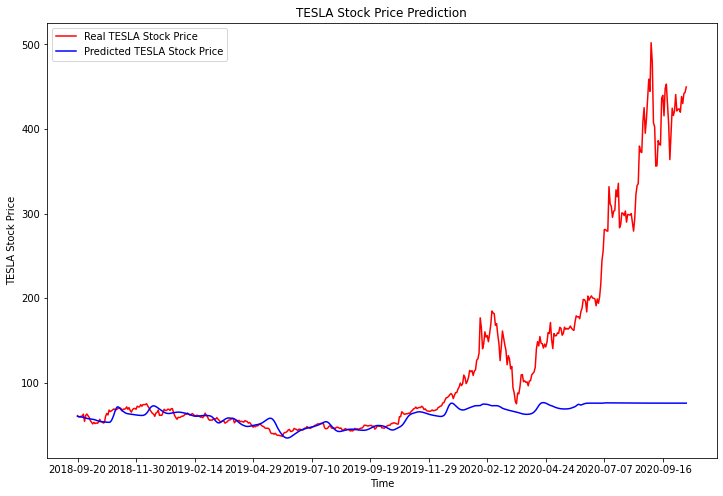

In [175]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800+7:, 'Date'],dataset_test1.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800+7:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 14, Hidden Layers: 4, Dropout Rate: 0.2

14 day

In [166]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800-14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+13, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(726, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.2

In [167]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0697
Epoch 2/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0252
Epoch 3/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0186
Epoch 4/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 5/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0190
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0185
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0187
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0171
Epoch 9/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0179
Epoch 10/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 11/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0186
Epoch 12/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 13/100
23/23 [=====

In [168]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_test1 = dataset_test[14:]
print(dataset_test1.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60+14, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(514, 1)
(514, 60, 1)


Make predictions using the test set

In [169]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

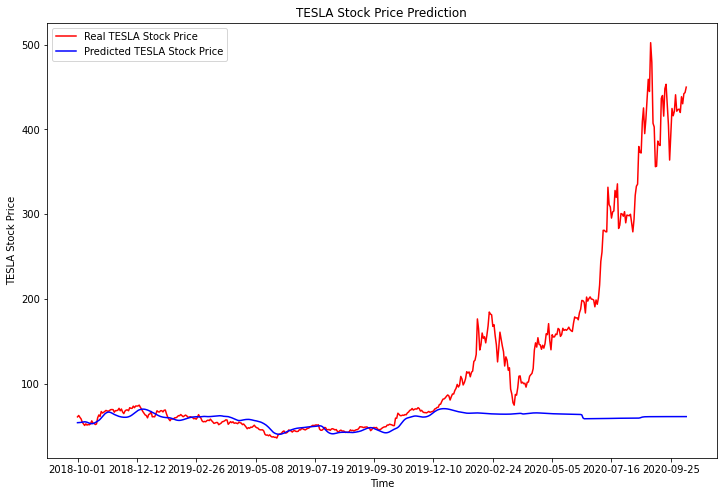

In [170]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800+14:, 'Date'],dataset_test1.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800+14:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Comparison 1: 4 vs 6 hidden layer

## Lag: 1, Hidden Layers: 6, Dropout Rate: 0.2

1 day

In [35]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(740, 60, 1)

Build LSTM mode, with 50 neurons and 6 layers, droupout rate = 0.2

In [36]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 1s 21ms/step - loss: 0.0710
Epoch 2/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0250
Epoch 3/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0166
Epoch 4/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0163
Epoch 5/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0154
Epoch 6/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0153
Epoch 7/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0145
Epoch 8/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0138
Epoch 9/100
24/24 [==============================] - 1s 21ms/step - loss: 0.0133
Epoch 10/100
24/24 [==============================] - 1s 21ms/step - loss: 0.0125
Epoch 11/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0136
Epoch 12/100
24/24 [==============================] - 1s 22ms/step - loss: 0.0124
Epoch 13/100
24/24 [=====

In [37]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [38]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

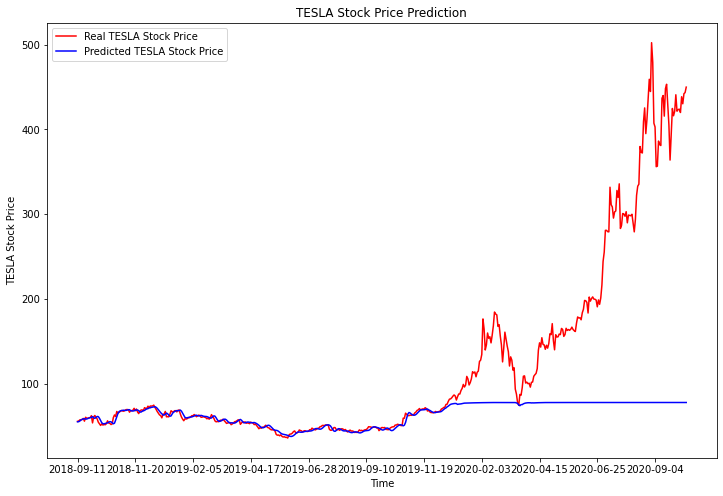

In [39]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 7, Hidden Layers: 6, Dropout Rate: 0.2

7 day

In [161]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800-7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+6, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(733, 60, 1)

Build LSTM mode, with 50 neurons and 6 layers, droupout rate = 0.2

In [162]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 0s 22ms/step - loss: 0.0820
Epoch 2/100
23/23 [==============================] - 1s 22ms/step - loss: 0.0232
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0190
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0183
Epoch 5/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0174
Epoch 6/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0180
Epoch 7/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0184
Epoch 8/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0168
Epoch 9/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0181
Epoch 10/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0165
Epoch 11/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0159
Epoch 12/100
23/23 [==============================] - 0s 20ms/step - loss: 0.0158
Epoch 13/100
23/23 [=====

In [163]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_test1 = dataset_test[7:]
print(dataset_test1.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60+7, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(521, 1)
(521, 60, 1)


Make predictions using the test set

In [164]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

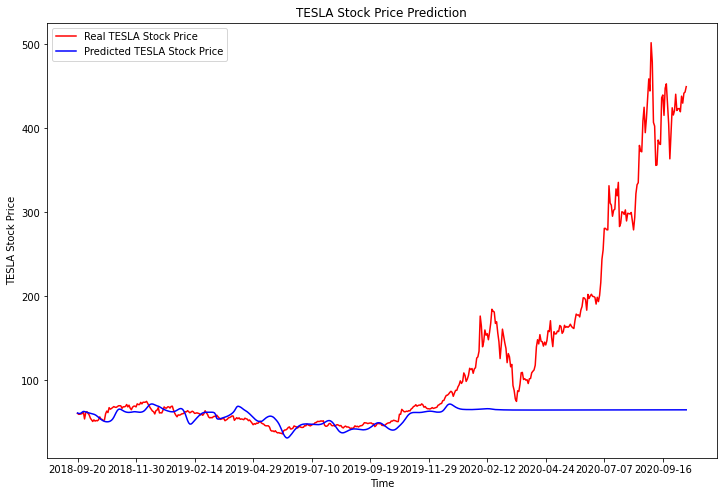

In [165]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800+7:, 'Date'],dataset_test1.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800+7:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 14, Hidden Layers: 6, Dropout Rate: 0.2

14 day

In [156]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800-14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+13, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(726, 60, 1)

Build LSTM mode, with 50 neurons and 6 layers, droupout rate = 0.2

In [157]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0834
Epoch 2/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0266
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0211
Epoch 4/100
23/23 [==============================] - 0s 20ms/step - loss: 0.0209
Epoch 5/100
23/23 [==============================] - 1s 22ms/step - loss: 0.0212
Epoch 6/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0207
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0208
Epoch 8/100
23/23 [==============================] - 0s 21ms/step - loss: 0.0216
Epoch 9/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0230
Epoch 10/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0197
Epoch 11/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0198
Epoch 12/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0179
Epoch 13/100
23/23 [=====

In [158]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_test1 = dataset_test[14:]
print(dataset_test1.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60+14, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(514, 1)
(514, 60, 1)


Make predictions using the test set

In [159]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

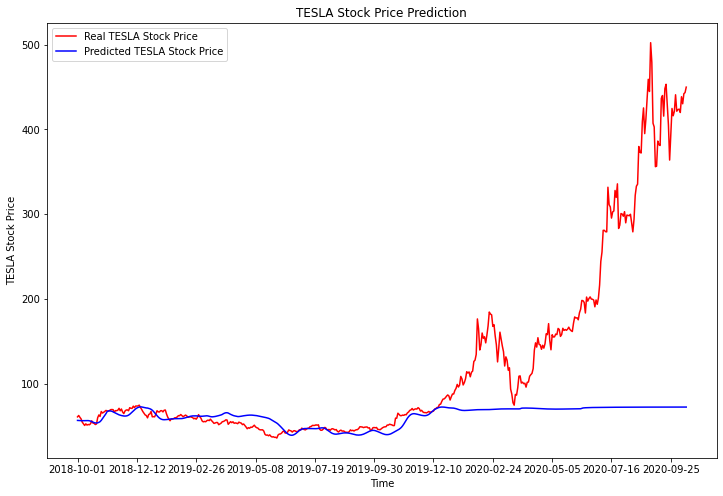

In [160]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800+14:, 'Date'],dataset_test1.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800+14:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Comparison 2: 0.2 vs 0.5 dropout rate

## Lag: 1, Hidden Layers: 4, Dropout Rate: 0.5

1 day

In [56]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(740, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.5

In [57]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0823
Epoch 2/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0263
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0227
Epoch 4/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0230
Epoch 5/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0181
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0191
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0174
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0174
Epoch 9/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0194
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0156
Epoch 11/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0164
Epoch 12/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0163
Epoch 13/100
24/24 [=====

In [58]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
print(dataset_test.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(528, 60, 1)


Make predictions using the test set

In [59]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

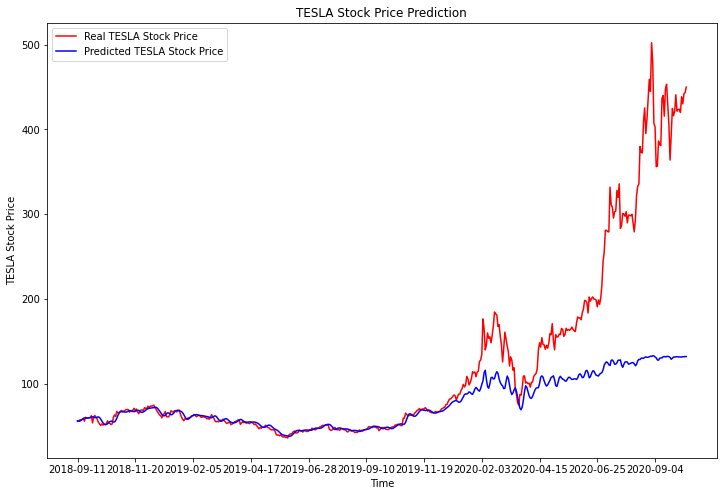

In [60]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 7, Hidden Layers: 4, Dropout Rate: 0.5

7 day

In [150]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800-7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+6, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(733, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.5

In [152]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0933
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0334
Epoch 3/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0303
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0234
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0234
Epoch 6/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0224
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0221
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0214
Epoch 9/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0207
Epoch 10/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0204
Epoch 11/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0211
Epoch 12/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0185
Epoch 13/100
23/23 [=====

In [153]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_test1 = dataset_test[7:]
print(dataset_test1.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60+7, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(521, 1)
(521, 60, 1)


Make predictions using the test set

In [154]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

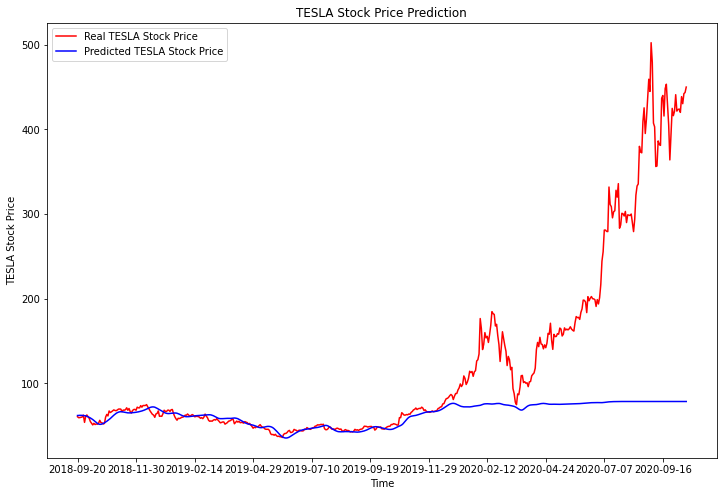

In [155]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800+7:, 'Date'],dataset_test1.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800+7:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

## Lag: 14, Hidden Layers: 4, Dropout Rate: 0.5

14 day

In [118]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800-14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+13, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(726, 60, 1)

Build LSTM mode, with 50 neurons and 4 layers, droupout rate = 0.5

In [119]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.5))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0962
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0339
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0278
Epoch 4/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0251
Epoch 5/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0247
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0257
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0236
Epoch 8/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0234
Epoch 9/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0259
Epoch 10/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0244
Epoch 11/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0236
Epoch 12/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0241
Epoch 13/100
23/23 [=====

In [147]:
# Getting the predicted stock price
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_test1 = dataset_test[14:]
print(dataset_test.shape)
print(dataset_test1.shape)
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60+14, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 1)
(514, 1)
(514, 60, 1)


Make predictions using the test set

In [148]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the results

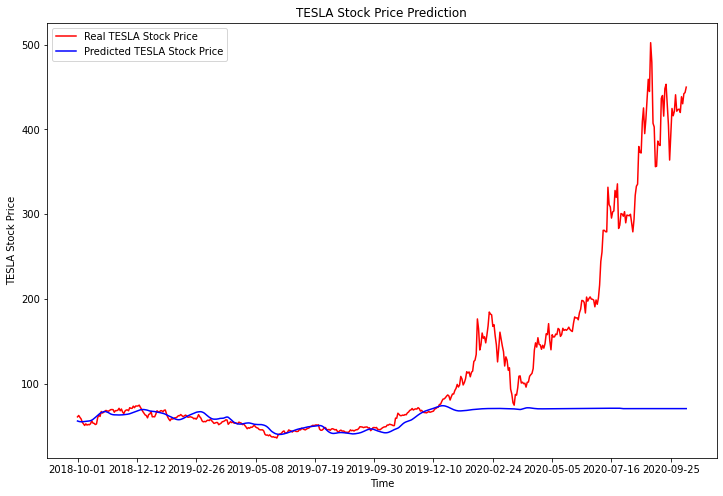

In [149]:
# Visualising the results
fig = plt.figure(figsize=(12,8))
plt.plot(df.loc[800+14:, 'Date'],dataset_test1.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800+14:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()